In [1]:
import numpy as np
import pandas as pd
import functools
from decimal import Decimal
import matplotlib.pyplot as plt

In [2]:
i=0
j=9
k=2

In [3]:

def conv(val):
   return float(val[:-1])



y=np.loadtxt("ezc_0_9_2_nosol.txt",dtype=float,skiprows=1,converters=conv)

print(y[19][0])

10000.0


In [4]:
ef = 0
z = 9
ch = 10

filetext =lambda efield,zd,chg : "ezc_"+str(efield)+"_"+str(zd)+"_"+str(Decimal('%1g'%(chg/5)).normalize())+"_nosol.txt"

ftxt_test = filetext(ef,z,ch)

print(ftxt_test)


ezc_0_9_2_nosol.txt


In [5]:

ef = 0
z = 9
ch = 10

orientation = 0

list_of_displacements = np.ndarray(shape=(10,4,10,4))

#print(list_of_displacements)

while ef < 10:
    while z < 13:
        while ch <= 20:
            read_line = filetext(ef,z,ch)
            #print(read_line)
            file_array=np.loadtxt(read_line,dtype=float,skiprows=1,converters=conv)
            while orientation < 4:
                #print(file_array[18][orientation])
                list_of_displacements[ef][z-9][ch-11][orientation]=file_array[18][orientation]
                orientation = orientation + 1
            orientation = 0
            ch = ch+1
        ch=10    
        z = z+1
    z=9    
    ef = ef +1
    
#List of displacements      [10][4][10][3]   (field),(z_dist),(charge),(x,y,z displacement) 

print(list_of_displacements)
            

            

[[[[9.50000000e+03 1.78950922e+00 3.90743917e+00 6.13014374e-01]
   [9.50000000e+03 1.36511074e+00 2.99799247e+00 5.08032765e-01]
   [9.50000000e+03 1.53434453e+00 3.45737939e+00 4.70449894e-01]
   ...
   [9.50000000e+03 4.56993255e-01 7.97259183e-01 3.03339688e-01]
   [9.50000000e+03 4.53742148e-01 8.00624202e-01 2.84535374e-01]
   [9.50000000e+03 5.20599794e-01 6.88641317e-01 2.73912346e-01]]

  [[9.50000000e+03 3.60390861e+00 8.37592980e+00 4.19157068e+00]
   [9.50000000e+03 3.64559547e+00 7.85372517e+00 4.13516565e+00]
   [9.50000000e+03 3.88117816e+00 7.42448850e+00 4.02442775e+00]
   ...
   [9.50000000e+03 2.95551561e+00 5.97117099e+00 3.53564297e+00]
   [9.50000000e+03 2.94679465e+00 6.01118321e+00 3.14111458e+00]
   [9.50000000e+03 2.78794216e+00 5.39642343e+00 3.26509577e+00]]

  [[9.50000000e+03 6.49891338e-01 7.67939681e-01 1.71079439e-01]
   [9.50000000e+03 5.91332194e-01 7.86202440e-01 1.93358161e-01]
   [9.50000000e+03 5.05480991e-01 6.06955371e-01 2.11639364e-01]
   ...


In [6]:
#List of displacements      [10][4][10][3]   (field),(z_dist),(charge),(x,y,z displacement)

[0.65533431 0.69397948 0.5848509  0.52691952 0.60979827 0.59891618
 0.66541935 0.5851336  0.6621482  0.62612573]


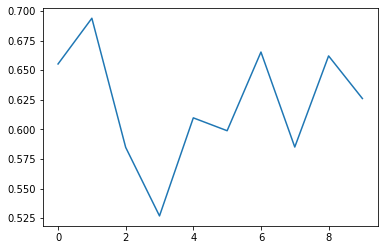

In [7]:
x = list_of_displacements[:,3,0,1]
print(x)
#y = list_of_displacements[:,0,0,1]
#print(y)
plt.plot(x)
plt.show()

[1.78950922 2.24713721 1.7189843  1.60437587 1.80125723 1.56615037
 1.58108546 1.61184538 1.70446168 1.47563871]


Text(0, 0.5, 'Displacement')

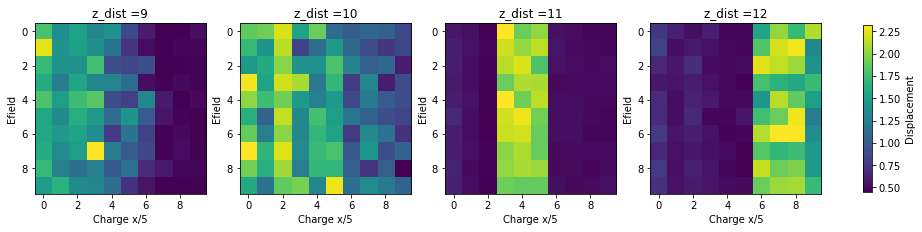

In [8]:


fig,axs = plt.subplots(1,4,figsize=(15,15))


#List of displacements      [10][4][10][3]   (field),(z_dist),(charge),(x,y,z displacement)
j=0
for i in axs:
    axs[j].set_xticks([0,2,4,6,8,10])
    axs[j].set_xlabel("Charge x/5")
    axs[j].set_title("z_dist ="+str(j+9))
    axs[j].set_ylabel("Efield")
    j=j+1

x = (list_of_displacements[:,0,:,1])
print(list_of_displacements[:,0,0,1])
y= (list_of_displacements[:,1,:,1])
z= (list_of_displacements[:,2,:,1])
t= (list_of_displacements[:,3,:,1])

im= axs[0].imshow(x )
axs[1].imshow(y)
axs[2].imshow(z)
axs[3].imshow(t)




cbar=plt.colorbar(im, ax=axs.ravel().tolist(),fraction=0.01)
cbar.ax.set_ylabel("Displacement")
#fig.colorbar(cax=cax)